In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
import numpy as np


songs_pd = pd.read_csv('song_data.csv')

#feature_1
result1 = songs_pd[["energy"]].multiply(songs_pd["loudness"], axis="index")
result1.rename(columns={'energy':'energy(loudness)'}, inplace = True)
songs_pd['result1'] = result1
songs_pd.rename(columns={'result1':'energy(loudness)'}, inplace = True)

#feature_2
songs_pd['log_energy(loudness)'] = np.log(songs_pd['energy(loudness)'])
result2 = songs_pd[["danceability"]].multiply(songs_pd["log_energy(loudness)"], axis="index")
result2.rename(columns={'danceability':'danceability_log_energy(loudness)'}, inplace = True)
songs_pd['result2'] = result2
songs_pd.rename(columns={'result2':'danceability_log_energy(loudness)'}, inplace = True)
del songs_pd['log_energy(loudness)']

#feature_3
songs_pd['log_loudness'] = np.log(songs_pd['loudness'])
result3 = songs_pd[["energy"]].multiply(songs_pd["log_loudness"], axis="index")
result3.rename(columns={'energy':'energy_log_loudness'}, inplace = True)
songs_pd['result3'] = result3
songs_pd.rename(columns={'result3':'energy_log_loudness'}, inplace = True)
del songs_pd['log_loudness']

#feature_4
songs_pd['log_speechiness'] = np.log(songs_pd['speechiness'])
result4 = songs_pd[["energy_log_loudness"]].multiply(songs_pd["log_speechiness"], axis="index")
result4.rename(columns={'energy_log_loudness':'energy_log_loudness_log_speechiness'}, inplace = True)
songs_pd['result4'] = result4
songs_pd.rename(columns={'result4':'energy_log_loudness_log_speechiness'}, inplace = True)
del songs_pd['log_speechiness']

#feature_5
result5 = songs_pd[["energy"]].multiply(songs_pd["instrumentalness"], axis="index")
result5.rename(columns={'energy':'energy(instrumentalness)'}, inplace = True)
songs_pd['result5'] = result5
songs_pd.rename(columns={'result5':'energy(instrumentalness)'}, inplace = True)

#feature_6
songs_pd['danceability_by_inverse_instrumentalness'] = songs_pd['danceability'] / (songs_pd['instrumentalness'] + 0.01)

#feature_7
songs_pd['dance_time_signature'] = songs_pd['danceability'] * songs_pd['time_signature']

#feature_8
songs_pd['dance_squared'] = songs_pd['danceability']**2

#feature_9
songs_pd['dance_instrumental'] = songs_pd['danceability'] * songs_pd['instrumentalness']

#feature_10
songs_pd['product_top3'] = songs_pd['dance_time_signature'] * songs_pd['dance_squared'] * songs_pd['dance_instrumental']
weights = [0.107240, 0.103108, -0.134385]

#feature_11
songs_pd['weighted_sum'] = (songs_pd['dance_time_signature'] * weights[0] +
                           songs_pd['dance_squared'] * weights[1] +
                           songs_pd['dance_instrumental'] * weights[2])

#feature_12
songs_pd['ranked_combined'] = songs_pd['product_top3'].rank()

#feature_13
songs_pd['combined_feature'] = songs_pd['weighted_sum'] - songs_pd['ranked_combined']

#feature_14
songs_pd['instrumentalness_plus_audio_valence'] = (songs_pd['instrumentalness'] + songs_pd['audio_valence'])

#feature_15
songs_pd['instrumentalness_plus_acousticness'] = (songs_pd['instrumentalness'] + songs_pd['acousticness'])

#feature_17
result6 = songs_pd[["instrumentalness"]].multiply(songs_pd["liveness"], axis="index")
result6.rename(columns={'instrumentalness':'instrumentalness(liveness)'}, inplace = True)
songs_pd['result6'] = result6
songs_pd.rename(columns={'result6':'instrumentalness(liveness)'}, inplace = True)

#feature_18
result7 = songs_pd[["danceability"]].multiply(songs_pd["energy"], axis="index")
result7.rename(columns={'danceability':'dance(energy)'}, inplace = True)
songs_pd['result7'] = result7
songs_pd.rename(columns={'result7':'dance(energy)'}, inplace = True)

#feature_19
songs_pd['dance_minus_instrument2'] = (songs_pd['danceability'] - songs_pd['instrumentalness'])**2

#feature_20
songs_pd['rank_dance_minus_instrument2'] = songs_pd['dance_minus_instrument2'].rank()

#feature_21
songs_pd['loud_acoustic'] = songs_pd['loudness'] * songs_pd['acousticness']


del songs_pd['energy(loudness)']
del songs_pd['energy_log_loudness']
del songs_pd['dance_time_signature']
del songs_pd['dance_squared']
del songs_pd['dance_instrumental']
del songs_pd['product_top3']
del songs_pd['weighted_sum']
del songs_pd['ranked_combined']

# Scale the features using MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

touse = songs_pd[['song_popularity','combined_feature', 'energy(instrumentalness)','instrumentalness_plus_audio_valence','instrumentalness_plus_acousticness', 'loudness', 'acousticness','tempo']].dropna()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(touse.drop(columns='song_popularity'), touse[['song_popularity']], test_size=0.3, random_state=49)

# Scale the features and target separately after the train/test split
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# Fitting the DecisionTreeRegressor and predicting
regr = DecisionTreeRegressor(random_state=0, max_depth=8)
regr.fit(X_train, y_train)
predictions = regr.predict(X_test)

# Calculating the r2 score
score = r2_score(y_test, predictions)
print(score)


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.08988213735938655


In [5]:
corr=songs_pd.corr()

<ipython-input-5-1386f6d822d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=songs_pd.corr()


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

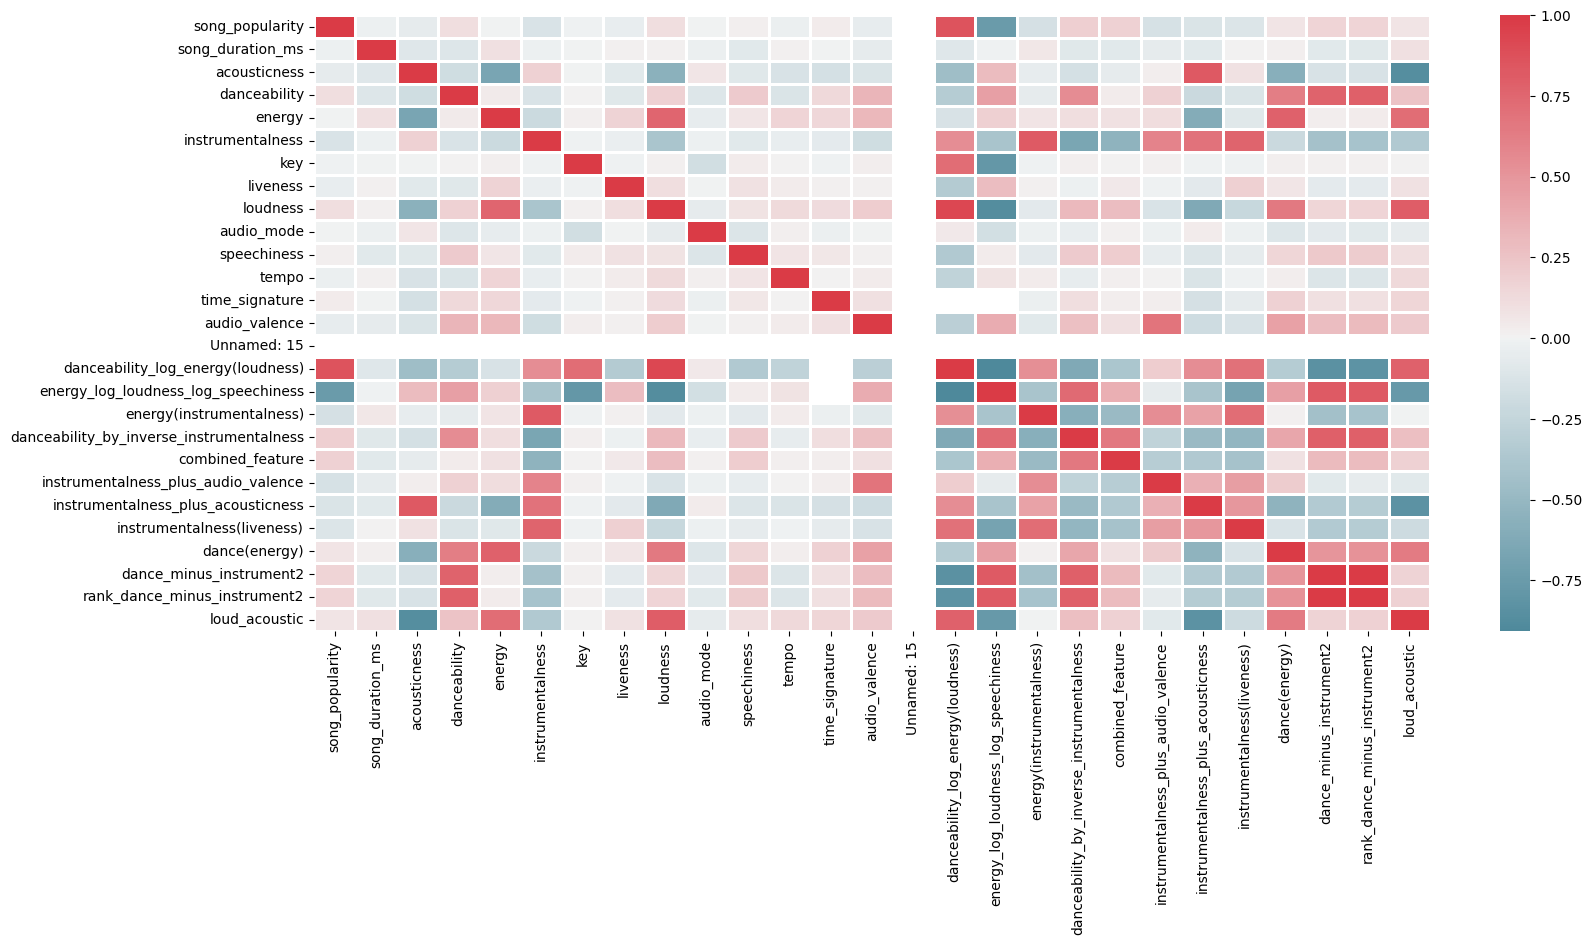

In [7]:
f, ax = plt.subplots(figsize=(18, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
heatmap=sns.heatmap(corr,cmap=cmap, center=0.0,vmax = 1, linewidths=1, ax=ax)
plt.show()